## Conclusions from three different models

### Bhavesh Kumar [16203173], Jeet Banerjee [17200844]

## State-based Learning

The State based supervised learner contains a simple Artificial neural network containing an input layer, 1 hidden layer and 1 output layer. The input and hidden layers use relu activation and output layer uses softmax since there is a multi-class classification. Rmsprop optimizer and categorical cross entropy loss function has been used, with accuracy as the evaluation metric.

We run *50 epochs with a batch size of 128*, the validation accuracy starts from *0.73 and increases upto 0.947*. The validation loss on the other hand decreases from *0.69 to 0.18*. On plotting, the training and validation loss both decrease and approach collinearity after nearly *30 epochs*. This proves that there is almost no over-fitting in the model.
For training the entire model, it took around 73 seconds and test accuracy happened to be *94.2%*.
The model was persisted and used to run the Lunar Lander for a test of 200 episodes. Genuinely good rewards were observed and it has been listed in the comparison table.


Computational complexity formula for ANN is = *2HC + H^2* parameters where C is total number of identical value in Input data set and H is number of hidden neurons.

For our ANN model, C = number of rows in the training set provided to the model (*C = X_train.shape[0] = 201209*) and *H = 6* (only one hidden layer). So we need total *2414544* parameters that are trained in the model.

The complexity of a single iteration in deep Neural networks depends on the structure of the deep layers. For a typical network, the time is influenced by the matrix multiplications while forward propagations. In a single layer with input dimension n and output dimension m, the forward and backward propagations will always be O(nmd) (if d is the batch size) which is of the order O(n<sup>3</sup>). 


## Image-based learning

Comparison of performance of two CNN model architectures on image dataset.

| Model architecture | Accuracy Trend | Loss Trend         
| :- |:- | :-
|<li>32 units Conv2D layer with 3x3 filter, <br>2x2 max pooling layer, <br>128 units dense layer| Training accuracy starts from 0.25 and goes upto 0.90, <br>Validation accuracy grows from 0.21 to 0.446. <br>Overfitting is evident as there was no dropout layer added.| Training loss starts from 3.17 and reduces till 0.27, <br>Validation loss in fact increases from 1.44 to 1.77. <br>It further proves that model is only focusing to <br>reduce the training loss, and is overfitting.
| |   |  
| <li>32 units Conv2D layer with 8x8 filter, <br>Dropout - 50%, 2x2 max pooling layer, <br><br>64 units Conv2D layer with 4x4 filter, <br>Dropout - 50%, 2x2 max pooling layer, <br><br>64 units Conv2D layer with 3x3 filter, Dropout - 50%, 2x2 max pooling layer, <br><br>512 units dense layerDropout- 50% | Training accuracy starts from 0.36 and goes upto 0.59, <br>Validation accuracy grows from 0.44 to 0.52. <br>Accuracy between train and validation set persist from Epoch 20 onwards. | Training loss starts from 1.26 and reduces till 0.84, <br>Validation loss falls from 1.23 to 0.98. <br>The training and accuracy loss become roughly equivalent before steadying, hence no overfitting.

The second model achieved way better results with nearly *47% test-set accuracy*, which was quite fitting considering the complexity of this classification problem in an image based approach. The time taken to train and fit the model was around *1271 seconds (~ 22 minutes)*. 

The total time complexity of all convolutional layers is:<br>
![](https://image.ibb.co/gyYPEH/Screen_Shot_2018_04_28_at_16_00_53.png)
Here l is the index of a convolutional layer, and d is the depth (number of convolutional layers). n<sub>l</sub> is the number of filters (also known as “width”) in the lth layer. n<sub>l-1</sub> is also known as the number of input channels of the lth layer. s<sub>l</sub> is the spatial size (length) of the filter. m<sub>l</sub> is the spatial size of the output feature map. This time complexity applies to both training and testing time, though with a different scale.  The training time per image is roughly three times of the testing time per image (one for forward propagation and two for backward propagation)

For our CNN model, <br>
Convolution Layer 1: *32 units, (8x8) filter*<br>
Convolution Layer 2: *64 units, (4x4) filter*<br>
Convolution Layer 3: *64 units, (3x3) filter*<br>
Time complexity = *(0) + (32 x 4<sup>2</sup> x 64 ) + (64 x 3<sup>2</sup> x 64 ) = 69,632 units* {with the feature map size omitted} <br><br>
Various model can be designed but understanding the constrained complexity is a challenging problem.  One approach is composing a series of “layer replacement” - at each time a few layers are replaced by some other layers that retain complexity, without changing the remaining layers. For the design of a layer replacement, various the trade-offs between factors have to be considered  - Between Depth and filter sizes, between depth and width, between width and filter sizes. 


## Reinforcement learning

Comparison of performance of three Reinforcement learning model architectures. *(All of them were trained on Google Cloud instance)*

|  Model configuration |  Reward details         
| :- |:-
|Layer 1- 50 (Activation - relu)<br> Layer 2 - 40(Activation - relu)<br> Layer 3- 4 (Activation - linear) <br>Learning rate : 1e-3| Min : -186.708 <br>Average: 134.832<br> Max : 259.201<br> Percentage of positive reward: 187/200 = 93.5%
| |   |  
|Layer 1- 128 (Activation - relu)<br> Layer 2 - 64(Activation - relu) <br>Layer 3 - 64(Activation - relu)<br> Layer 4-  4 (Activation - linear)<br>Learning rate : 1e-3| Min : -68.525 <br>Average: 190.84 <br>Max : 273.197 <br>Percentage of positive reward: 189/200 = 94.5%
| |   |  
|Layer 1- 512 (Activation - relu)<br> Layer 2 - 256(Activation - relu) <br>Layer 3 - 128(Activation - relu)<br> Layer 4-  4 (Activation - linear)<br>Learning rate : 1e-5|Min : -42.36 <br>Average: 195.68<br>Max : 251.4<br>Percentage of positive reward: 199/200 = 99.5%



Thus, Model 3 architecture gives the best overall rewards. Average reward is *195.68* whereas the maximum is *251.4*. 
Only one test episode resulted in a negative reward, so the trained model performs really well. The time taken to train and fit the model was around *4-5 hours*. This is quite exorbitant time taken in comparison to ANN and CNN.

It is assumed that a Q-learning algorithm is zero initialized and operates on the goal-reward representation. The first Q-value that changes is the Q-value of the action that takes an agent to a goal state. When the agent reaches a goal state, the average number of steps required can be exponential in n, the number of states.

If a state space has no duplicate actions, then e ≤ n<sup>2</sup> and the worst-case complexity becomes O(n<sup>3</sup>). This provides an upper bound on the complexity of the Qlearning algorithm. (e - exponent)

Often it has been seen that choosing a good task representation or reasonable initial Q-values decreases the complexity of Q-learning significantly. 

![](https://image.ibb.co/fHLqMx/Screen_Shot_2018_04_28_at_16_10_17.png =1x1) 

# TASK 4 
# Experimentation


The player mod files and RL trained weights file can be found from here:
1. [ANN Player](https://drive.google.com/file/d/1eihISI-oprDhkV9dv5-dxqtLLAvKMTC6/view?usp=sharing)

2. [CNN Player](https://drive.google.com/file/d/1W6KQ-S1mFiHfbFmt-64ApYQjAs9wfDNX/view?usp=sharing)

3. [RL Trained weights](https://drive.google.com/file/d/1vPvgV3r0Z3nKllZLlNfHcPGjr4fBVhqq/view?usp=sharing)

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

 Load CSV Files containing rewards from each model's player

In [347]:
ann = pd.read_csv("lunarlander_ml_states_rewards.csv")
cnn = pd.read_csv("lunarlander_ml_images_rewards.csv")
rl = pd.read_csv("lunarlander_rl_rewards.csv")

### Plot Rewards for all three models

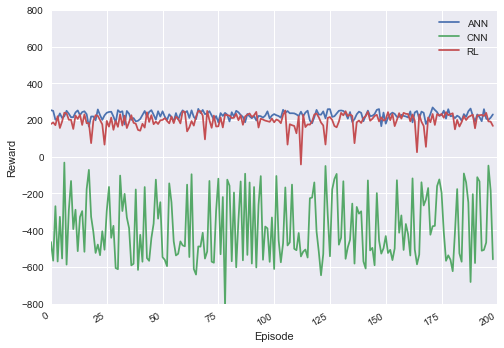

In [343]:
plt.figure(figsize = (8,6))
x1= ann.index.values
y1 = ann.values.flatten().tolist()
plt.plot(x1,y1)

x2 = cnn.index.values
y2 = cnn.values.flatten().tolist()
plt.plot(x2,y2)

x3= rl.index.values
y3 = rl.values.flatten().tolist()
plt.plot(x3,y3)

plt.xlim(0,200)
plt.ylim(-800,800)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.gcf().autofmt_xdate()
plt.legend(['ANN', 'CNN', 'RL'], loc='upper right')
plt.show()

### A boxplot visualisation of rewards as assessed by three models

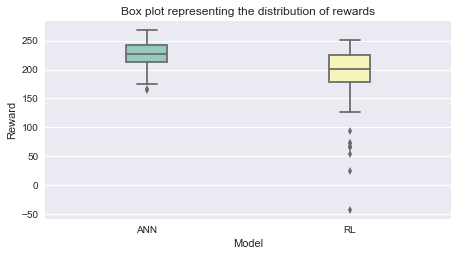

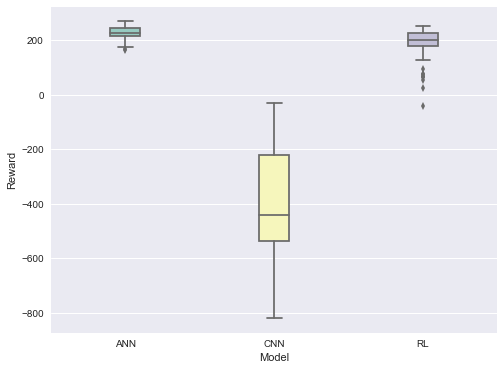

In [342]:
plt.figure(figsize = (16,8))
x1= ann.index.values
y1 = ann.values.flatten().tolist()

x2 = cnn.index.values
y2 = cnn.values.flatten().tolist()

x3= rl.index.values
y3 = rl.values.flatten().tolist()
data =[y1,y3]

plt.subplot(2,2,1)
sns.boxplot(data=data, orient='v', width = 0.2, palette="Set3")
label = ["ANN", "RL"]
index = np.arange(len(label))
plt.xticks(index, label)
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Box plot representing the distribution of rewards")

plt.figure(figsize = (8,6))
data2 = [y1,y2,y3]
sns.boxplot(data=data2, orient='v', width = 0.2, palette="Set3")
label = ["ANN", "CNN", "RL"]
index = np.arange(len(label))
plt.xticks(index, label)
plt.xlabel("Model")
plt.ylabel("Reward")
plt.show()

Density plot of rewards from three models

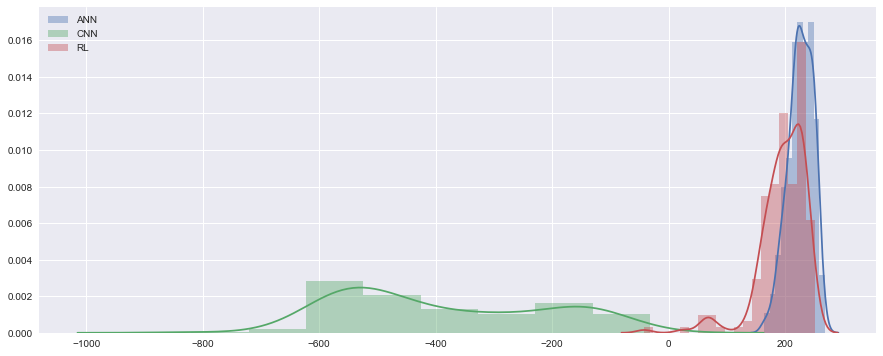

In [275]:
plt.figure(figsize=(15,6))
x1= ann.index.values
y1 = ann.values.flatten().tolist()

x2 = cnn.index.values
y2 = cnn.values.flatten().tolist()

x3= rl.index.values
y3 = rl.values.flatten().tolist()

sns.distplot(y1)
sns.distplot(y2)
sns.distplot(y3)
plt.legend(["ANN", "CNN", "RL"])
plt.show()

### Comparison of Performance of each model

As illustrated from the above plots,
1. CNN shows least mean reward with a very high standard deviation.
2. ANN and RL reward distribution almost overlap each other, showing that they gave almost identical rewards.
3. ANN shows highest mean reward with lower standard deviation than RL.
4. The RL model has most stabilised rewards and even though the mean is a bit lesser than ANN, there is not much fluctuation in the rewards. Only a few outliers are present in RL that lie outside the min-max range which can be observed from the boxplot.

So, the Reinforcement learning model can be summarised to be the best model in terms of rewards as the evaluation measure obtained over a period of 200 episodes.

Few statistics illustrating the comparison of rewards generated for 200 test episodes:

| Statistic | ANN | CNN | RL         
| :- |:- | :- | :-
|Average Reward| 226.20  | -389.70 | 195.68
| Worst Reward | 164.05 | -819.95 |-42.36
|Best Reward| 268.15  | -32.22 | 251.4
| Percentage of rewards better than average reward | 103/200 = 51.5% | 86/200 = 43% | 113/200=56.5%
| Percentage of positive rewards | 100% | 0% | 99.5%
| Time taken to train | ~1 min | ~20 min | ~5 hours

### Comparison of  amount of computation required to train each model

1. The time taken to train the ANN model was nearly 1 minute, whereas the CNN model took around 20 minutes to run (even with only 50% dataset). ANN model accomplised really strong rewards during the experiment with highest average and maximum reward. 

2. Even though the CNN model took nearly 20 times longer to train, the accuracy is still not comparable and consequently it gives poor negative rewards during the experiment. One of the reasons is that CNN is taking the image dataset which is not as clean and proper as the state vectors dataset.

3. Contrarily, the RL model took nearly 5 hours to train (Remembering that RL Lunar lander environment is also taking state vectors for training and testing). The RL model started from a very large negative reward (around -600), but after nearly 1million steps, it started achieveing positive rewards, and started maintaining the good rewards and kept achieving better results. After 1.5million steps, the reward became constant which meant that the model has mastered itself, and was ready for the testing experiment.

4. To conclude, the ANN model took extremely less time and gave reasonably good results, CNN performed poorly even after taking considerable amount of time due to the image-based dataset, and RL took extremely long time but gave the best model that was fully ready and stable for future experiements and utilisation.

Further improvements possible that can enhance the test rewards are:
1. Use a stack of images to train the image-based model. 
2. More network architectures could be experimented in the Reinforcement learning, with proper tuning of Weight update rate and learning rate. 
3. Grid searches could be performed to get the best hidden layer configurations in CNN and RL.

## References:
[1] Complexity Analysis of Real-Time Reinforcement Learning <a href="http://idm-lab.org/bib/abstracts/papers/aaai93.pdf">Sven Koenig and Reid G. Simmons</a>

[2] Convolutional Neural Networks at Constrained Time Cost <a href="https://arxiv.org/pdf/1412.1710.pdf">Kaiming He and Jian Sun</a>

[3] Hardness of Proper Learning  <a href="https://researcher.watson.ibm.com/researcher/files/us-vitaly/PittValiant88-2014.pdf">(1988; Pitt, Valiant)</a>

[4] Computational Complexity Of Neural Networks  <a href="https://kasperfred.com/posts/computational-complexity-of-neural-networks">Kasper Fredenslund</a>
